In [1]:
# import libraries
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math as m

# built-in statistics functions
from statistics import variance
from scipy.stats import mode

#plotting
plt.rcParams.update({'font.size': 16})

**Exercise 7.1**

In [2]:
# load data
iris = pd.read_excel('./iris.xlsx')
iris

,Petal Width (cm),Petal Length (cm),Sepal Width (cm),Sepal Length (cm),Class
0,2,14,33,50,0
1,24,56,31,67,1
2,23,51,31,69,1
3,2,10,36,46,0
4,20,52,30,65,1
...,...,...,...,...,...
145,20,50,25,57,1
146,13,40,23,55,2
147,2,17,34,54,0
148,24,51,28,58,1


In [3]:
# randomly shuffling the dataset rows and separating into 80% training, 20% test
# and convert to numpy matrices for better computation
N = len(iris)
iris = iris.sample(frac=1).reset_index(drop=True)
training = iris[:int(N*0.8)].to_numpy()
validation = iris[int(N*0.8):].to_numpy()

In [4]:
def KNN(test, training, K):
    # function which tests test data against training data using a K nearest neighbours algorithm
    # assuming classes of test and training lie in their final column
    
    # data lengths
    ntrain = len(training)
    nvalid = len(test)
    
    # true and predicted classes
    correct_classes = test[:,-1]
    predicted_classes = np.zeros(nvalid)
    
    for i in range(nvalid):
        # arbitrary distances and classes to preliminary assign to test data
        dists = 1000*np.ones(K)
        cs = -1*np.ones(K)

        for j in range(ntrain):
            # compute distance to each training point
            dtrial = la.norm(test[i,:-1] - training[j,:-1])
            
            if dtrial < dists.max():
                # if we find a new nearest neighbour we add its distance and class to vote
                dists[np.argmax(dists)] = dtrial
                cs[np.argmax(dists)] = training[j,-1]
        
        # assign class of test data to mode class of K nearest neighbours
        predicted_classes[i] = mode(cs)[0]
    
    # proportion of correct classifications
    return 1 - np.count_nonzero(predicted_classes - correct_classes)/nvalid

In [5]:
# test case
KNN(validation, training, 1)

0.9

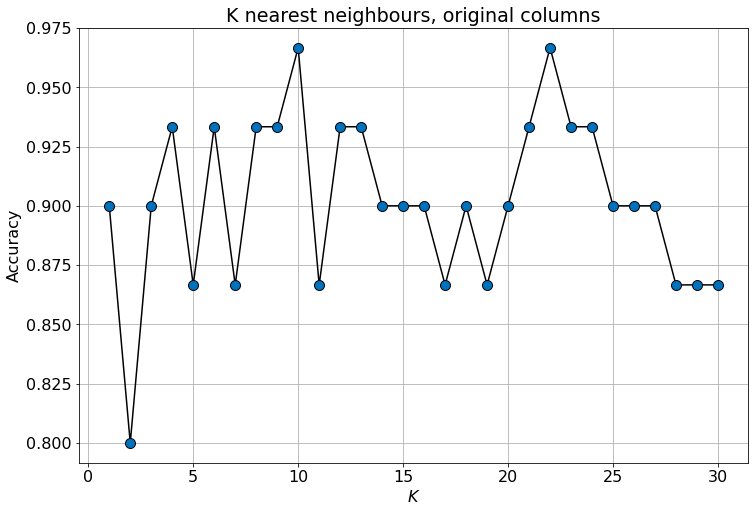

In [6]:
# KNN for K = 1, ..., 30
K = 30
accuracies = np.zeros(K+1)
for ks in range(1,K+1):
    accuracies[ks] = KNN(validation, training, ks)

# plotting
fig = plt.figure(figsize=(12,8))

plt.plot(range(1,K+1), accuracies[1:], '-ko', markersize=10, markerfacecolor=(0, 0.447, 0.741, 1))
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.title('K nearest neighbours, original columns')
plt.grid()

rescaling the data columns to lie in [0,1] and repeating the above code

In [7]:
# reload data
iris = pd.read_excel('./iris.xlsx',dtype='float64')
iris = iris.to_numpy()

In [8]:
# rescaling data columns
N = len(iris)
for l in range(4):
    iris[:,l] = iris[:,l]/iris[:,l].max()

In [9]:
# randomly shuffling the dataset rows and separating into 80% training, 20% test
# and convert to numpy matrices for better computation
np.random.shuffle(iris)
training = iris[:int(N*0.8)]
validation = iris[int(N*0.8):]

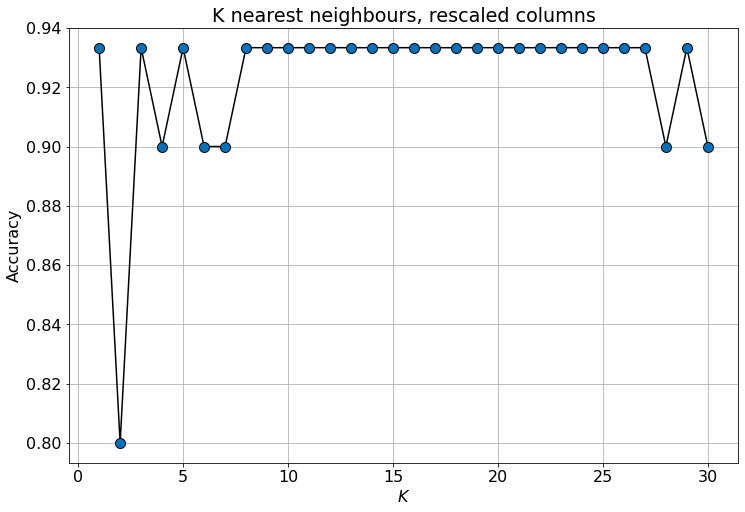

In [10]:
# KNN for K = 1, ..., 30
accuracies = np.zeros(K+1)
for ks in range(1,K+1):
    accuracies[ks] = KNN(validation, training, ks)

# plotting
fig = plt.figure(figsize=(12,8))

plt.plot(range(1,K+1), accuracies[1:], '-ko', markersize=10, markerfacecolor=(0, 0.447, 0.741, 1))
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.title('K nearest neighbours, rescaled columns')
plt.grid()

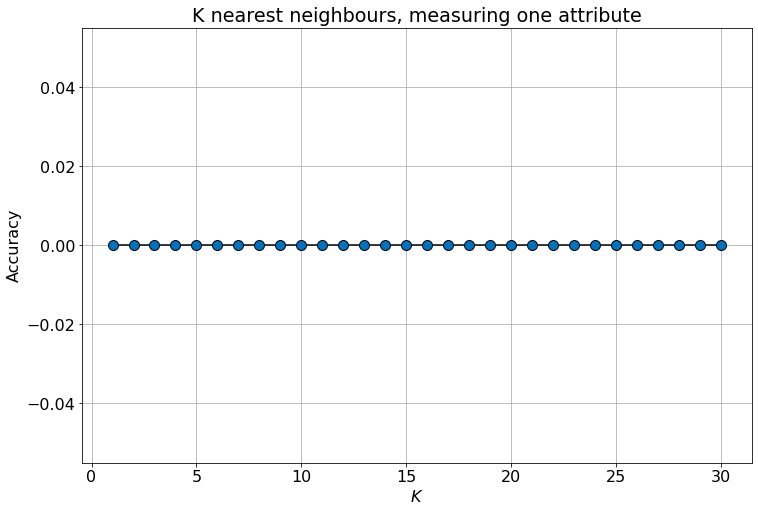

In [11]:
# redefining function to only use one attribute for distance measure
def KNNselective(test, training, K, attribute):
    ntrain = len(training)
    nvalid = len(test)
    
    correct_classes = test[:,-1]
    predicted_classes = np.zeros(nvalid)
    
    for i in range(nvalid):
        dists = 1000*np.ones(K)
        cs = -1*np.ones(K)
        test[i,-1] = -1
        
        for j in range(ntrain):
            dtrial = np.sqrt((test[i,attribute] - training[j,attribute])**2)
            
            if dtrial < dists.max():
                dists[np.argmax(dists)] = dtrial
                cs[np.argmax(dists)] = training[j,-1]
    
        predicted_classes[i] = mode(cs)[0]

    return 1 - np.count_nonzero(predicted_classes - correct_classes)/nvalid

# KNN for K = 1, ..., 30
accuracies = np.zeros(K+1)
for ks in range(1,K+1):
    accuracies[ks] = KNNselective(validation, training, ks, 3)

# plotting
fig = plt.figure(figsize=(12,8))

plt.plot(range(1,K+1), accuracies[1:], '-ko', markersize=10, markerfacecolor=(0, 0.447, 0.741, 1))
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.title('K nearest neighbours, measuring one attribute')
plt.grid()

**Exercise 7.2**

In [12]:
# load data
wisco = pd.read_excel('./WisconsinCancer.xlsx')
wisco = wisco.drop(['id'], axis=1)
wisco

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
# converting to numpy matrix
wisco = wisco.to_numpy()

# rescaling data columns
N = len(wisco)
ncol = 30
for l in range(1,ncol+1):
    wisco[:,l] = wisco[:,l]/wisco[:,l].max()

In [14]:
# true classifications
truth = wisco[:,0]

# might have to re-run this cell if C1 = C2
[n1, n2] = np.random.randint(0, N, size=2)
C1 = wisco[n1,:]
C2 = wisco[n2,:]

C1 == C2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [15]:
# stores predicted classifications by algorithm
predictions = []

for i in range(N):
    D1 = la.norm(wisco[i,1:] - C1[1:])
    D2 = la.norm(wisco[i,1:] - C2[1:])
    
    if D1 <= D2:
        predictions += ['B']
    else:
        predictions += ['B']

print(predictions == truth)
print(np.count_nonzero(predictions == truth)/N)

[False False False False False False False False False False False False
 False False False False False False False  True  True  True False False
 False False False False False False False False False False False False
 False  True False False False False False False False False  True False
  True  True  True  True  True False False  True False False  True  True
  True  True False  True False False  True  True  True  True False  True
 False False  True False  True False False  True  True  True False False
  True False False False  True  True  True False  True  True False False
  True  True  True False False  True  True  True  True False  True  True
 False  True  True  True  True  True  True  True  True False False False
  True False False  True  True  True False False  True False  True False
 False  True False False  True  True False  True  True False  True  True
  True  True False  True  True  True  True  True  True  True  True  True
 False  True  True  True  True False False  True Fa

**Exercise 7.4**

In [16]:
# x1,x2 dataset
data = np.array([[-2, -1], [25, 6], [17, 4], [-15, -6]])

# true output
true = np.array([1, 0, 0, 1])

In [17]:
# logistic sigmoid and its derivative
def sigmoid(x):
    return (1 + np.exp(-x))**-1

def Dsigmoid(x):
    return np.exp(-x)*(1 + np.exp(-x))**-2

# error function
def error(ws, bs):
    # weights and biases to minimise
    [w1, w2, w3, w4, w5, w6] = ws
    [b1, b2, b3] = bs
    errsum = 0
    
    for j in range(4):
        [X1, X2] = data[j,:]
        O = sigmoid(w5*sigmoid(w1*X1 + w2*X2 + b1) + w6*sigmoid(w3*X1 + w4*X2 + b2) + b3)
        errsum += (O - true[j])**2
    
    return errsum/4

# gradient (NB: one output only due to stochasticity)
def Derror(ws, bs):
    # weights and biases to minimise
    [w1, w2, w3, w4, w5, w6] = ws
    [b1, b2, b3] = bs
    
    # output
    O = w5*sigmoid(w1*x1 + w2*x2 + b1) + w6*sigmoid(w3*x1 + w4*x2 + b2) + b3
    
    # error PD wrt output
    DE = 2*(O - true[idx])*Dsigmoid(O)
    
    # output PDs wrt weights and biases
    Db1 = w5*Dsigmoid(w1*x1 + w2*x2 + b1)
    Db2 = w5*Dsigmoid(w1*x1 + w2*x2 + b1)
    Dw3 = w6*Dsigmoid(w3*x1 + w4*x2 + b2)*x1
    Dw4 = w6*Dsigmoid(w3*x1 + w4*x2 + b2)*x2
    Dw5 = sigmoid(w1*x1 + w2*x2 + b1)
    Dw6 = sigmoid(w3*x1 + w4*x2 + b2)
    Dw1 = Db1*x1
    Dw2 = Db2*x2
    Db3 = 1
    
    return DE*np.array([Dw1, Dw2, Dw3, Dw4, Dw5, Dw6, Db1, Db2, Db3])

In [18]:
# inputs
wn = np.ones(6)
bn = np.zeros(3)
alpha = 0.1
Nsim = 1000
Es = np.zeros(Nsim)
Es[0] = error(wn, bn)

for i in range(1,Nsim):
    # random data selection
    idx = np.random.randint(0, 4)
    [x1, x2] = data[idx,:]
    
    # gradient descent
    wn = wn - alpha*Derror(wn, bn)[:6]
    bn = bn - alpha*Derror(wn, bn)[6:]
    
    # store errors
    Es[i] = error(wn, bn)

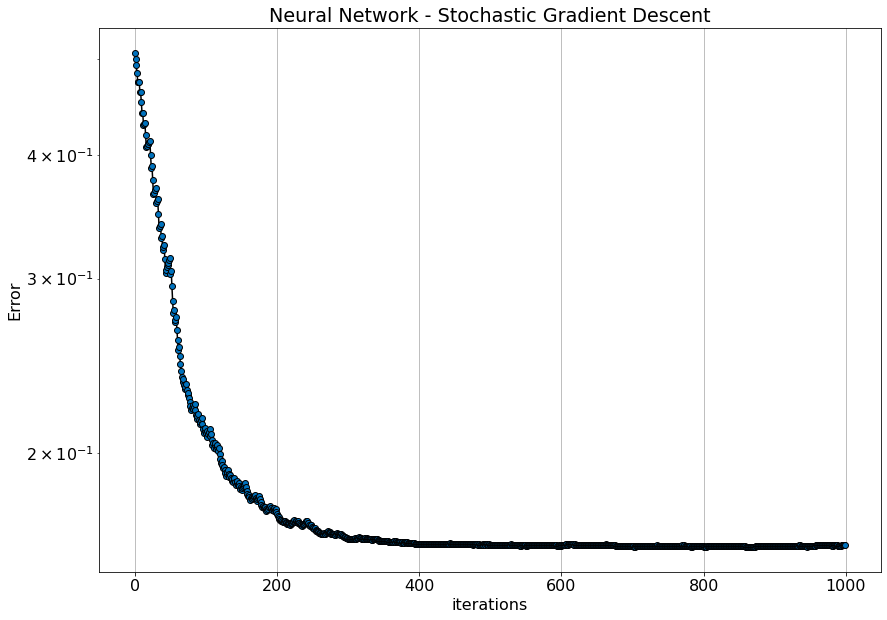

In [19]:
# plotting
fig = plt.figure(figsize=(14,10))

plt.plot(range(Nsim), Es, '-ko', markersize=6, markerfacecolor=(0, 0.447, 0.741, 1))
plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel('Error')
plt.title('Neural Network - Stochastic Gradient Descent')
plt.grid()

In [20]:
print(wn)
print(bn)

[ 0.99421896  0.99710948  0.99421896  0.99710948 -0.51144837 -0.51144837]
[0.00309066 0.00309066 1.02484276]


In [21]:
# test A
X1 = -7
X2 = -3
[w1, w2, w3, w4, w5, w6] = wn
[b1, b2, b3] = bn

sigmoid(w5*sigmoid(w1*X1 + w2*X2 + b1) + w6*sigmoid(w3*X1 + w4*X2 + b2) + b3)

7.359053273700109e-01

In [22]:
# test B
X1 = 20
X2 = 2
[w1, w2, w3, w4, w5, w6] = wn
[b1, b2, b3] = bn

sigmoid(w5*sigmoid(w1*X1 + w2*X2 + b1) + w6*sigmoid(w3*X1 + w4*X2 + b2) + b3)

5.00486503917364e-01